In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd

# Load the data
ola_reviews = pd.read_csv('Ola Customer Reviews 1.csv')


# Display the first few rows of each dataset
ola_reviews_head = ola_reviews.head()


ola_reviews_head


C:\Users\USER\AppData\Local\Temp\ipykernel_10620\2161073972.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ola_reviews = pd.read_csv('Ola Customer Reviews 1.csv')


,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,fbc7ffc9-5a89-446e-87fd-d69bf4a7f984,Puipuii Ralte,NaN,"The map in Ola is so messed up, i have to pay ...",1,0.0,8/10/2023 16:40,NaN,NaN,6.3.2,en,in
1,Google Play,5a0051fb-220a-45b2-ba94-a15a2949218f,Deepak Kumar,NaN,Deepak Kumar.... 🙏🙏🙏🙏🙏],5,0.0,8/10/2023 16:36,NaN,NaN,NaN,en,in
2,Google Play,71ebf933-b734-474d-bb65-a18c90906ed2,Ahamed Azarudeen,NaN,Such aa irresponsible app more then I waiting ...,1,0.0,8/10/2023 16:29,NaN,NaN,6.3.1,en,in
3,Google Play,e1cc0010-60b3-4126-99c2-e8549088566a,Rahil Syed,NaN,Worst,1,0.0,8/10/2023 15:52,NaN,NaN,5.0.4,en,in
4,Google Play,77cf1be1-b428-4493-ae25-e0f288f79b8f,vin 007,NaN,Too much expensive .. try UBer... They are pro...,1,0.0,8/10/2023 15:51,NaN,NaN,NaN,en,in


In [4]:
# Check the basic information of both datasets
ola_info = ola_reviews.info()


# Check for missing values in both datasets
ola_missing = ola_reviews.isnull().sum()


# Check the number of unique values in each column
ola_unique = ola_reviews.nunique()


ola_info, ola_missing, ola_unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357698 entries, 0 to 357697
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   source                   357698 non-null  object 
 1   review_id                357698 non-null  object 
 2   user_name                357698 non-null  object 
 3   review_title             891 non-null     object 
 4   review_description       357682 non-null  object 
 5   rating                   357698 non-null  int64  
 6   thumbs_up                356807 non-null  float64
 7   review_date              357698 non-null  object 
 8   developer_response       124769 non-null  object 
 9   developer_response_date  124590 non-null  object 
 10  appVersion               275326 non-null  object 
 11  laguage_code             357698 non-null  object 
 12  country_code             357698 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 35.5+ MB


(None,
 source                          0
 review_id                       0
 user_name                       0
 review_title               356807
 review_description             16
 rating                          0
 thumbs_up                     891
 review_date                     0
 developer_response         232929
 developer_response_date    233108
 appVersion                  82372
 laguage_code                    0
 country_code                    0
 dtype: int64,
 source                          2
 review_id                  357698
 user_name                  164457
 review_title                  825
 review_description         242273
 rating                          5
 thumbs_up                     405
 review_date                327651
 developer_response          89523
 developer_response_date     95387
 appVersion                    224
 laguage_code                    1
 country_code                    1
 dtype: int64)

In [5]:
ola_reviews.drop('review_title', axis=1, inplace=True)

# Fill missing values in 'thumbs_up' column with 0
ola_reviews['thumbs_up'].fillna(0, inplace=True)

# Convert 'review_date' and 'developer_response_date' to datetime objects
ola_reviews['review_date'] = pd.to_datetime(ola_reviews['review_date'])

ola_reviews['developer_response_date'] = pd.to_datetime(ola_reviews['developer_response_date'])

# Check the first few rows of the cleaned datasets
ola_reviews_head = ola_reviews.head()

ola_reviews_head

,source,review_id,user_name,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,fbc7ffc9-5a89-446e-87fd-d69bf4a7f984,Puipuii Ralte,"The map in Ola is so messed up, i have to pay ...",1,0.0,2023-08-10 16:40:00,NaN,NaT,6.3.2,en,in
1,Google Play,5a0051fb-220a-45b2-ba94-a15a2949218f,Deepak Kumar,Deepak Kumar.... 🙏🙏🙏🙏🙏],5,0.0,2023-08-10 16:36:00,NaN,NaT,NaN,en,in
2,Google Play,71ebf933-b734-474d-bb65-a18c90906ed2,Ahamed Azarudeen,Such aa irresponsible app more then I waiting ...,1,0.0,2023-08-10 16:29:00,NaN,NaT,6.3.1,en,in
3,Google Play,e1cc0010-60b3-4126-99c2-e8549088566a,Rahil Syed,Worst,1,0.0,2023-08-10 15:52:00,NaN,NaT,5.0.4,en,in
4,Google Play,77cf1be1-b428-4493-ae25-e0f288f79b8f,vin 007,Too much expensive .. try UBer... They are pro...,1,0.0,2023-08-10 15:51:00,NaN,NaT,NaN,en,in


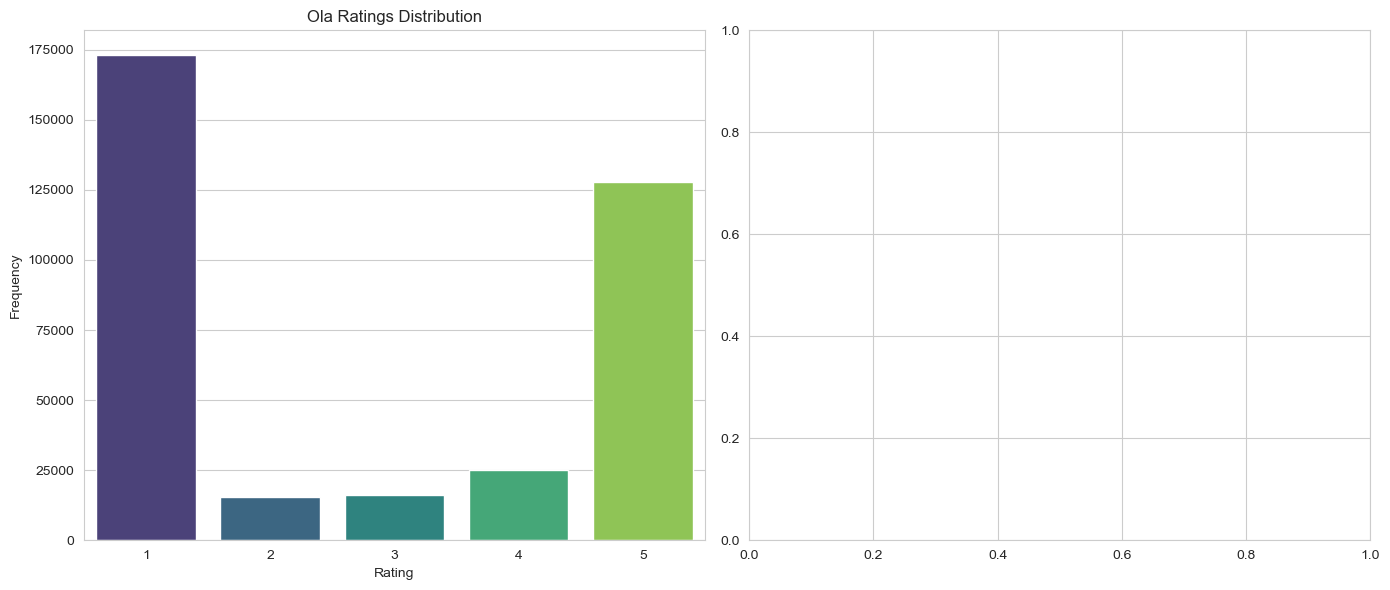

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of ratings for Ola
sns.countplot(x='rating', data=ola_reviews, palette='viridis', ax=axes[0])
axes[0].set_title('Ola Ratings Distribution')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')



plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ola Positive Reviews:


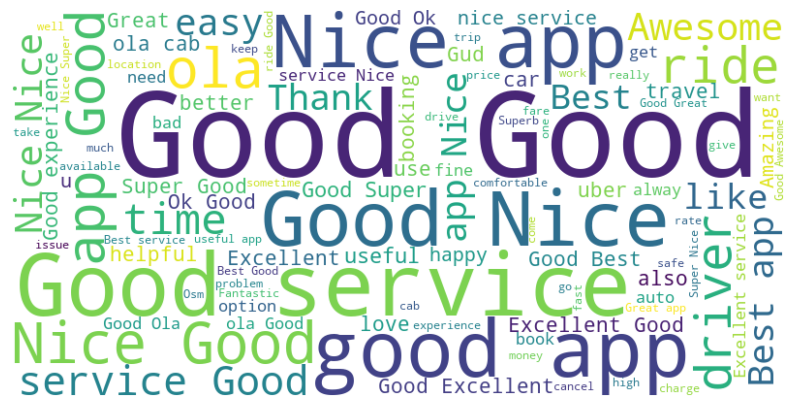

Ola Neutral Reviews:


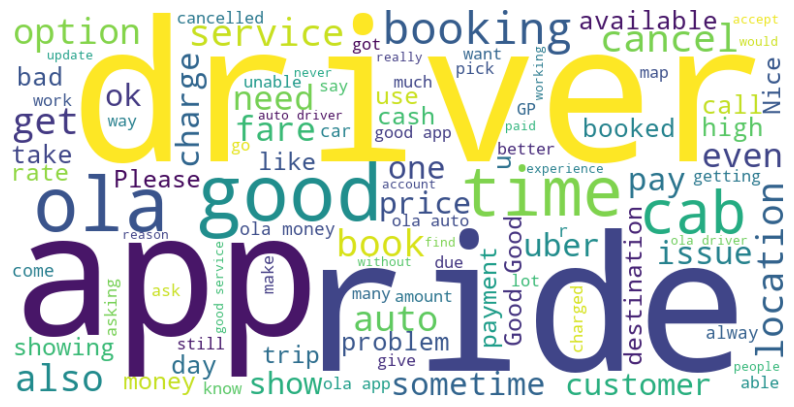

Ola Negative Reviews:


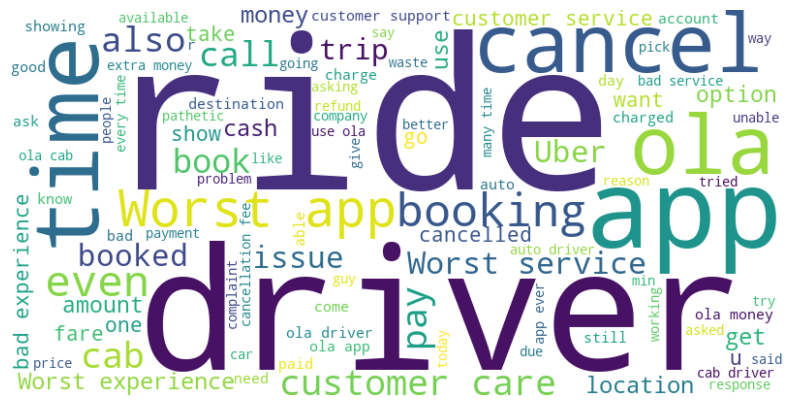

In [7]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

# Download the stopwords from nltk
nltk.download('stopwords')

# Define a function to create a word cloud
def create_word_cloud(text):
    # Define the stopwords
    stop_words = set(stopwords.words('english'))
    
    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=stop_words, max_words=100).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Categorize the reviews into positive, neutral, and negative
ola_reviews['sentiment'] = ola_reviews['rating'].apply(lambda x: 'positive' if x >= 4 else 'neutral' if x == 3 else 'negative')

# Combine the review descriptions into a single text for each category
ola_positive_reviews = ' '.join(ola_reviews[ola_reviews['sentiment'] == 'positive']['review_description'].dropna())
ola_neutral_reviews = ' '.join(ola_reviews[ola_reviews['sentiment'] == 'neutral']['review_description'].dropna())
ola_negative_reviews = ' '.join(ola_reviews[ola_reviews['sentiment'] == 'negative']['review_description'].dropna())

# Create a word cloud for each category of Ola reviews
print('Ola Positive Reviews:')
create_word_cloud(ola_positive_reviews)

print('Ola Neutral Reviews:')
create_word_cloud(ola_neutral_reviews)

print('Ola Negative Reviews:')
create_word_cloud(ola_negative_reviews)


In [8]:
# Create a new column indicating the presence of a developer response
ola_reviews['developer_response_present'] = ola_reviews['developer_response'].notna()

# Calculate the average number of thumbs up for reviews with and without a developer response
ola_avg_thumbs_up = ola_reviews.groupby('developer_response_present')['thumbs_up'].mean()


ola_avg_thumbs_up


developer_response_present
False    0.832936
True     0.971475
Name: thumbs_up, dtype: float64

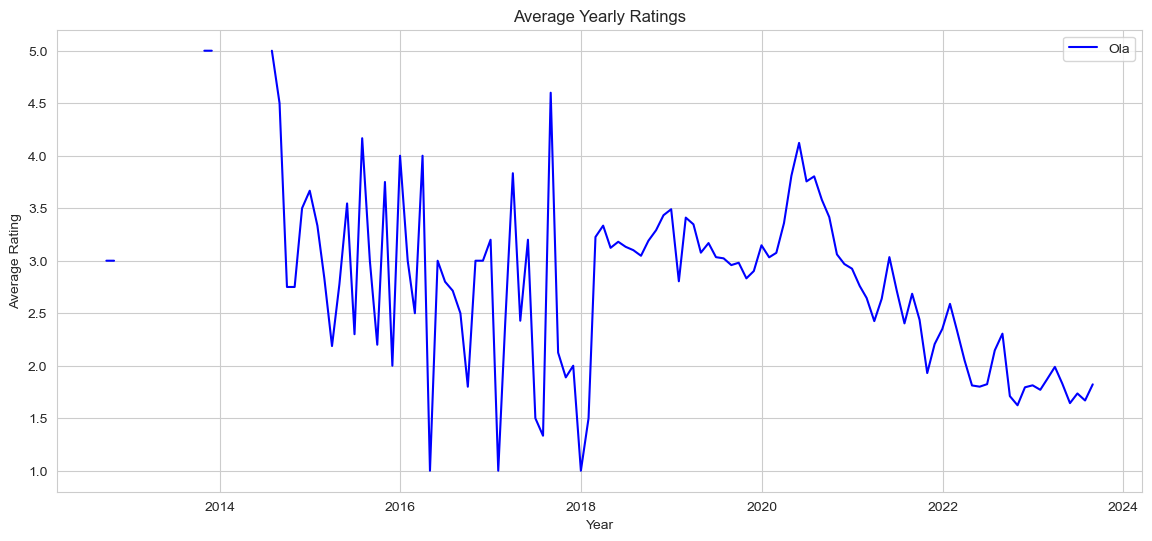

In [33]:
# Resample the data to get the average rating per month
ola_monthly_avg_rating = ola_reviews.resample('M', on='review_date')['rating'].mean()


# Create a line plot of the average monthly ratings
plt.figure(figsize=(14, 6))
plt.plot(ola_monthly_avg_rating.index, ola_monthly_avg_rating.values, label='Ola', color='b')

plt.title('Average Yearly Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.show()


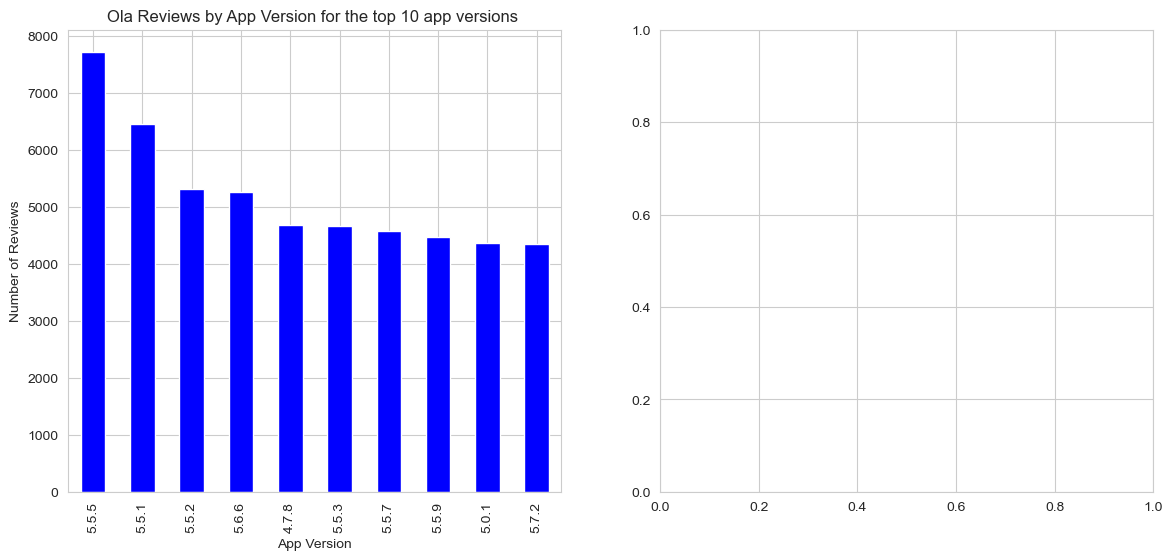

In [10]:
ola_app_version_counts = ola_reviews['appVersion'].value_counts().head(10)


# Create a bar plot of the review counts for the top 10 app versions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ola_app_version_counts.plot(kind='bar', ax=axes[0], color='b')
axes[0].set_title('Ola Reviews by App Version for the top 10 app versions ')
axes[0].set_xlabel('App Version')
axes[0].set_ylabel('Number of Reviews')




plt.show()

In [12]:
ola_reviews.replace(np.nan,'0',inplace =True)

In [13]:
ola_reviews.isnull().sum()

source                        0
review_id                     0
user_name                     0
review_description            0
rating                        0
thumbs_up                     0
review_date                   0
developer_response            0
developer_response_date       0
appVersion                    0
laguage_code                  0
country_code                  0
sentiment                     0
developer_response_present    0
dtype: int64

In [14]:
ola_reviews.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_10620\188664462.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ola_reviews.corr()


,rating,thumbs_up,developer_response_present
rating,1.000000,-0.036701,-0.230883
thumbs_up,-0.036701,1.000000,0.004027
developer_response_present,-0.230883,0.004027,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_10620\3927306615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ola_reviews.corr())


<Axes: >

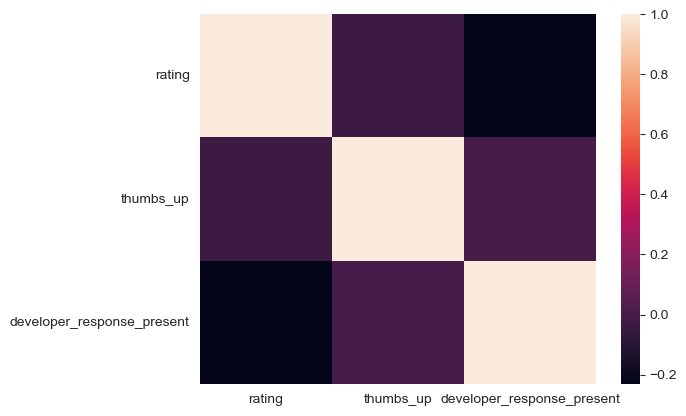

In [15]:

sns.heatmap(ola_reviews.corr())

In [17]:
ratings = ola_reviews["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [23]:
import plotly.express as px
figure = px.pie(ola_reviews, values=quantity, names=numbers,hole = 0.5)
figure.show()


In [31]:
from textblob import TextBlob

# Sample user review
user_review = "The Ola app is great! I love their service.Its cheap and the best app for use.Its awesome to use and very good and helpful...."

# Perform sentiment analysis
blob = TextBlob(user_review)
sentiment_score = blob.sentiment.polarity

if sentiment_score > 0:
    sentiment_label = "Positive"
elif sentiment_score < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print("Sentiment Score:", sentiment_score)
print("Sentiment Label:", sentiment_label)

Sentiment Score: 0.8016666666666666
Sentiment Label: Positive


In [32]:
# Sample user review
user_review = "Ola needs to really work on the drivers. Who don't accept the ride for short distances.. worst app."

# Perform sentiment analysis
blob = TextBlob(user_review)
sentiment_score = blob.sentiment.polarity

if sentiment_score > 0:
    sentiment_label = "Positive"
elif sentiment_score < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print("Sentiment Score:", sentiment_score)
print("Sentiment Label:", sentiment_label)

Sentiment Score: -0.26666666666666666
Sentiment Label: Negative
